# Explor thorium-large dataset

In [1]:
import datetime
import calendar
import time
import json
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

# Load project

In [2]:
PROJECT_FOLDER = '../../datasets/thorium-large/'

with open(PROJECT_FOLDER + 'project.json', 'r') as file:
    project = json.load(file)
print(json.dumps(project, indent=4))

def load_series(fname, name):
    path = PROJECT_FOLDER + fname + '.csv'
    xs = pd.read_csv(path, parse_dates=['time'])
    xs = xs.set_index('time')[name].fillna(0)
    xs = xs.resample('5T').pad()
    xs = xs.rename(fname)
    return xs
    

flow1_raw = load_series('flow1', 'flow')
flow1_edited = load_series('flow1_edited', 'flow_edited')

flow2_raw = load_series('flow2', 'flow')
flow2_edited = load_series('flow2_edited', 'flow_edited')

flow3_raw = load_series('flow3', 'flow')
flow3_edited = load_series('flow3_edited', 'flow_edited')

flow4_raw = load_series('flow4', 'flow')
flow4_edited = load_series('flow4_edited', 'flow_edited')

flow5_raw = load_series('flow5', 'flow')
flow5_edited = load_series('flow5_edited', 'flow_edited')

rainfall = load_series('rainfall1', 'rainfall')

{
    "end-date": "2017-12-31",
    "flows": [
        "flow1",
        "flow2",
        "flow3",
        "flow4",
        "flow5"
    ],
    "name": "thorium-large",
    "rainfalls": [
        "rainfall"
    ],
    "split-date": "2017-01-01",
    "start-date": "2015-06-02"
}


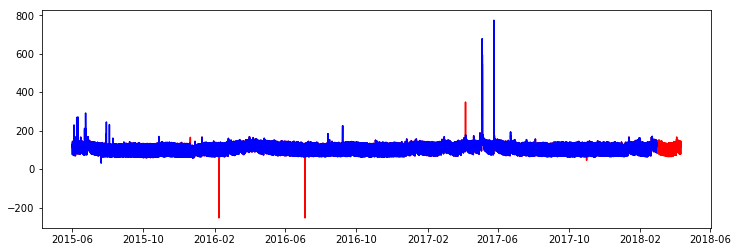

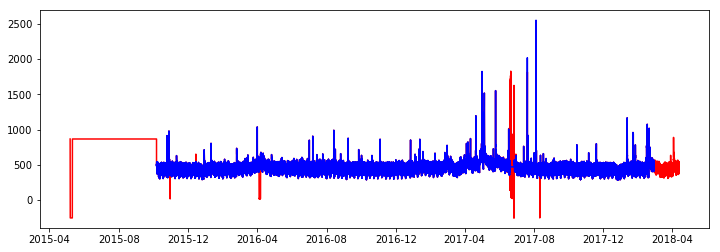

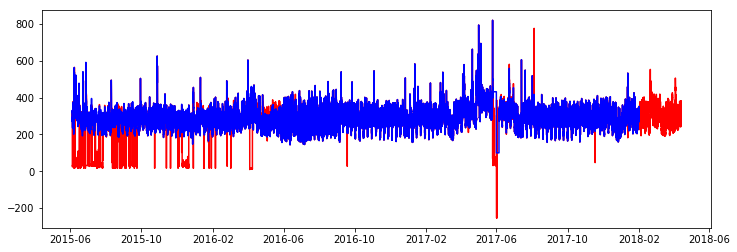

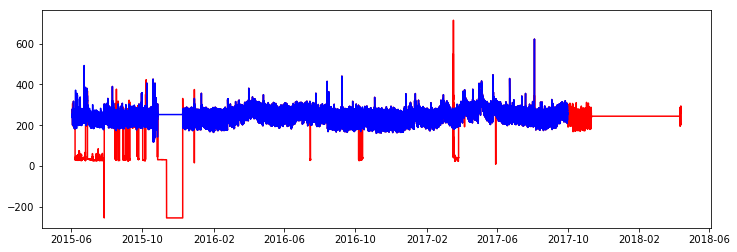

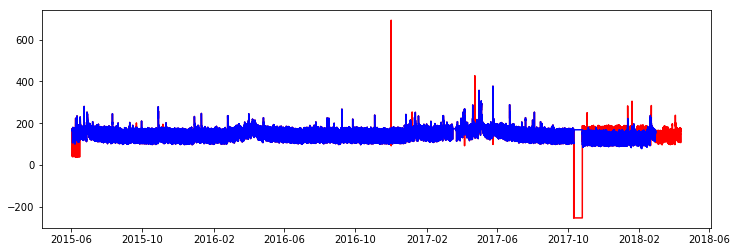

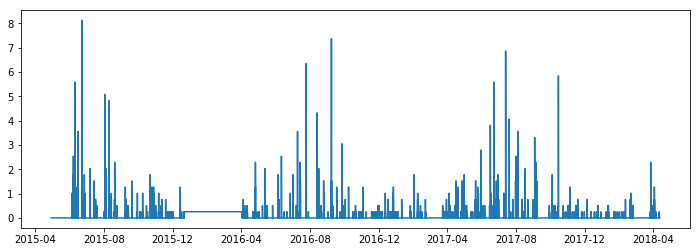

In [15]:
plt.plot(flow1_raw, color='r')
plt.plot(flow1_edited, color='b')
plt.show()

plt.plot(flow2_raw, color='r')
plt.plot(flow2_edited, color='b')
plt.show()

plt.plot(flow3_raw, color='r')
plt.plot(flow3_edited, color='b')
plt.show()

plt.plot(flow4_raw, color='r')
plt.plot(flow4_edited, color='b')
plt.show()

plt.plot(flow5_raw, color='r')
plt.plot(flow5_edited, color='b')
plt.show()

plt.plot(rainfall)
plt.show()

In [9]:
flow1_anomalies = np.abs(flow1_raw - flow1_edited) > 0.001
flow1_anomalies.rename('flow1_anomalies')
flow2_anomalies = np.abs(flow2_raw - flow2_edited) > 0.001
flow2_anomalies.rename('flow2_anomalies')
flow3_anomalies = np.abs(flow3_raw - flow3_edited) > 0.001
flow3_anomalies.rename('flow3_anomalies')
flow4_anomalies = np.abs(flow4_raw - flow4_edited) > 0.001
flow4_anomalies.rename('flow4_anomalies')
flow5_anomalies = np.abs(flow5_raw - flow5_edited) > 0.001
flow5_anomalies.rename('flow5_anomalies')

df = pd.concat(
    [flow1_raw, 
     flow1_edited,
     flow1_anomalies,
     flow2_raw, 
     flow2_edited,
     flow2_anomalies,
     flow3_raw, 
     flow3_edited,
     flow3_anomalies,
     flow4_raw, 
     flow4_edited,
     flow4_anomalies,
     flow5_raw, 
     flow5_edited,
     flow5_anomalies,
     rainfall
    ], 
    axis=1)
data_frame = df['2016-01-01':]
data_frame.head()

,flow1,flow1_edited,0,flow2,flow2_edited,1,flow3,flow3_edited,2,flow4,flow4_edited,3,flow5,flow5_edited,4,rainfall1
time,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,93.889999,93.889999,False,420.320007,420.320007,False,252.089996,252.089996,False,225.460007,225.460007,False,146.110001,146.110001,False,0.254
2016-01-01 00:05:00,93.480003,93.480003,False,416.660004,416.660004,False,251.850006,251.850006,False,225.470001,225.470001,False,145.320007,145.320007,False,0.254
2016-01-01 00:10:00,92.830002,92.830002,False,416.670013,416.670013,False,260.440002,260.440002,False,225.190002,225.190002,False,144.899994,144.899994,False,0.254
2016-01-01 00:15:00,92.199997,92.199997,False,415.059998,415.059998,False,255.789993,255.789993,False,225.229996,225.229996,False,140.699997,140.699997,False,0.254
2016-01-01 00:20:00,91.959999,91.959999,False,414.279999,414.279999,False,255.550003,255.550003,False,225.699997,225.699997,False,140.259995,140.259995,False,0.254
